# Sentiment Analysis (Student Online Learning Experiences)

## Import libraries and datasets

In [142]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from __future__ import division
import nltk, re
from nltk.tag import pos_tag
from nltk.draw import tree
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string
import seaborn as sns
%matplotlib inline

confession = pd.read_csv('confession-data.csv', encoding='utf-8')

#remove warning message
import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Data Exploration

In [143]:
confession

,Title,Title_link,Texts,Likes,Comments
0,#USMCFS24935,https://www.facebook.com/hashtag/usmcfs24935?_...,NaN,1.0,NaN
1,#USMCFS24938,https://www.facebook.com/hashtag/usmcfs24938?_...,I really hope USM authorities don't hurt this ...,62.0,"Top FanAdam TanBruh, I don't think they can ev..."
2,#USMCFS24941,https://www.facebook.com/hashtag/usmcfs24941?_...,I know it's hard time we going through but yet...,NaN,NaN
3,#USMCFS24943,https://www.facebook.com/hashtag/usmcfs24943?_...,The only thing we need right now is Apology St...,35.0,NaN
4,#USMCFS24946,https://www.facebook.com/hashtag/usmcfs24946?_...,USM WE ALWAYS LEAD,33.0,NaN
...,...,...,...,...,...
1535,Hann Hui,https://www.facebook.com/hann.hui.5205?comment...,I hope Germany wins.,43.0,Top FanHann HuiManchester United will win
1536,Hsieh Ting Chuan,https://www.facebook.com/ht.ctatoo?comment_id=...,"We had been warned that we are ""violating the ...",73.0,NaN
1537,Ng Leet Yee,https://www.facebook.com/ngleetyee?comment_id=...,1) Be courteous (no name-calling & avoid curse...,17.0,Ng Leet Yeesorry for asking this but can someo...
1538,Rachel Buddy,https://www.facebook.com/rachel.buddy.5?commen...,These are the last few of them:,44.0,NaN


In [144]:
confession.describe()

,Likes
count,1455.000000
mean,22.394502
std,41.362021
min,1.000000
25%,3.000000
50%,8.000000
75%,24.000000
max,618.000000


In [145]:
confession.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1540 entries, 0 to 1539
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Title       1540 non-null   object 
 1   Title_link  1540 non-null   object 
 2   Texts       1271 non-null   object 
 3   Likes       1455 non-null   float64
 4   Comments    178 non-null    object 
dtypes: float64(1), object(4)
memory usage: 60.3+ KB


In [146]:
confession.columns

Index(['Title', 'Title_link', 'Texts', 'Likes', 'Comments'], dtype='object')

In [147]:
len(confession)

1540

In [148]:
confession.shape

(1540, 5)

In [149]:
#check missing value
nullValue = confession.isnull().any()
nullValue

Title         False
Title_link    False
Texts          True
Likes          True
Comments       True
dtype: bool

In [150]:
#missing value percentage in each column
((confession.isnull() | confession.isna()).sum() * 100 / confession.index.size).round(2)

Title          0.00
Title_link     0.00
Texts         17.47
Likes          5.52
Comments      88.44
dtype: float64

### Data visualization

In [151]:
#display information about confession posts
confession.head()

,Title,Title_link,Texts,Likes,Comments
0,#USMCFS24935,https://www.facebook.com/hashtag/usmcfs24935?_...,NaN,1.0,NaN
1,#USMCFS24938,https://www.facebook.com/hashtag/usmcfs24938?_...,I really hope USM authorities don't hurt this ...,62.0,"Top FanAdam TanBruh, I don't think they can ev..."
2,#USMCFS24941,https://www.facebook.com/hashtag/usmcfs24941?_...,I know it's hard time we going through but yet...,NaN,NaN
3,#USMCFS24943,https://www.facebook.com/hashtag/usmcfs24943?_...,The only thing we need right now is Apology St...,35.0,NaN
4,#USMCFS24946,https://www.facebook.com/hashtag/usmcfs24946?_...,USM WE ALWAYS LEAD,33.0,NaN


## Data Preprocessing

In [152]:
data = confession.fillna(0)
data.head(10)

,Title,Title_link,Texts,Likes,Comments
0,#USMCFS24935,https://www.facebook.com/hashtag/usmcfs24935?_...,0,1.0,0
1,#USMCFS24938,https://www.facebook.com/hashtag/usmcfs24938?_...,I really hope USM authorities don't hurt this ...,62.0,"Top FanAdam TanBruh, I don't think they can ev..."
2,#USMCFS24941,https://www.facebook.com/hashtag/usmcfs24941?_...,I know it's hard time we going through but yet...,0.0,0
3,#USMCFS24943,https://www.facebook.com/hashtag/usmcfs24943?_...,The only thing we need right now is Apology St...,35.0,0
4,#USMCFS24946,https://www.facebook.com/hashtag/usmcfs24946?_...,USM WE ALWAYS LEAD,33.0,0
5,#USMCFS24949,https://www.facebook.com/hashtag/usmcfs24949?_...,"Is it wrong for me to think ""why have kids whe...",67.0,0
6,#USMCFS24969,https://www.facebook.com/hashtag/usmcfs24969?_...,#USMCFS24944,17.0,0 Comments
7,#USMCFS24971,https://www.facebook.com/hashtag/usmcfs24971?_...,WF !!!!,3.0,0 Comments
8,#USMCFS24972,https://www.facebook.com/hashtag/usmcfs24972?_...,你以为你长得好看 成绩好就很了不起是吗？,41.0,1 Comment
9,#USMCFS24975,https://www.facebook.com/hashtag/usmcfs24975?_...,QUESTION STUDY INVESTIGATION OF FALSAFAH COURS...,0.0,0


In [153]:
#dropping unnecessary columns
data.drop(columns = ['Title','Title_link','Likes','Comments'], inplace = True)
data

,Texts
0,0
1,I really hope USM authorities don't hurt this ...
2,I know it's hard time we going through but yet...
3,The only thing we need right now is Apology St...
4,USM WE ALWAYS LEAD
...,...
1535,I hope Germany wins.
1536,"We had been warned that we are ""violating the ..."
1537,1) Be courteous (no name-calling & avoid curse...
1538,These are the last few of them:


In [154]:
#creating the dataframe to classify out the texts data column and use dropna to remove the missing value
n=10
textData=pd.DataFrame(data,columns=['Texts'])
textData=textData.replace(0, np.nan)
textData.dropna(inplace=True)
textData.head()

,Texts
1,I really hope USM authorities don't hurt this ...
2,I know it's hard time we going through but yet...
3,The only thing we need right now is Apology St...
4,USM WE ALWAYS LEAD
5,"Is it wrong for me to think ""why have kids whe..."


In [155]:
textData.shape

(1271, 1)

In [156]:
import re
import string

# Apply the first round of cleaning
def clean_text (textData):
    # remove tab, new line, ans back slice
    textData = textData.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    textData =  textData.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    textData = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", textData).split())
    # remove incomplete URL
    textData=textData.replace("http://", " ").replace("https://", " ")
    # remove non-English characters
    textData = re.sub("([^\x00-\x7F])+"," ",textData)
    #remove number
    textData= re.sub(r"\d+", "", textData)
    #remove punctuation
    textData =  textData.translate(str.maketrans("","",string.punctuation))
    #remove whitespace leading & trailing
    textData =  textData.strip()
    #remove multiple whitespace into single whitespace
    textData = re.sub('\s+',' ',textData)
    return textData

textClean1 = lambda x: clean_text(x)

In [157]:
textData['Clean Texts'] = pd.DataFrame(textData['Texts'].apply(textClean1))
textData.head(10)

,Texts,Clean Texts
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...
6,#USMCFS24944,
7,WF !!!!,WF
8,你以为你长得好看 成绩好就很了不起是吗？,
9,QUESTION STUDY INVESTIGATION OF FALSAFAH COURS...,QUESTION STUDY INVESTIGATION OF FALSAFAH COURS...
10,全部自己讲自己爽?,


In [158]:
#perform tokenization by converting each words into tokens
textData['tokens'] = textData.apply(lambda row: nltk.word_tokenize(row['Clean Texts']), axis=1)
textData.head()

,Texts,Clean Texts,tokens
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt..."
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,..."
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A..."
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]"
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,..."


In [159]:
#use a function to perform the convertion of texts into token follows by removal of stopwords and the tagging of (PART OF SPEECH) POS
# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

textData['POS Tagged'] = textData['Clean Texts'].apply(token_stop_pos)
textData.head()

,Texts,Clean Texts,tokens,POS Tagged
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie..."
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ..."
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ..."
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]"
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (..."


In [160]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

textData['Lemma'] = textData['POS Tagged'].apply(lemmatize)
textData.head()

,Texts,Clean Texts,tokens,POS Tagged,Lemma
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...


## Data Analysis

In [161]:
#install wordcloud library
#!pip install wordcloud

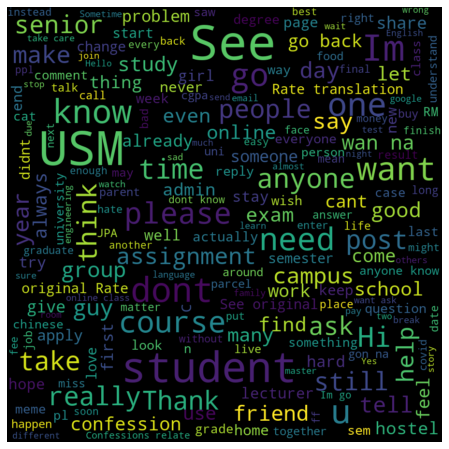

In [162]:
#visualize the most used words in the confession posts
words= "," .join( textData['Lemma'])
from wordcloud import WordCloud
wordcloud = WordCloud(width=900,height=900,random_state=42,max_font_size=100).generate(words)

#plot frequently used words graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

### Sentiment Classification using Textblob

In [163]:
#install textblob library
#!pip install textblob
from textblob import TextBlob

In [164]:
#create a function for subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function for the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#create 2 new columns for textData
textData['Subjectivity']=textData['Lemma'].apply(getSubjectivity)
textData['Polarity']=textData['Lemma'].apply(getPolarity)

textData

,Texts,Clean Texts,tokens,POS Tagged,Lemma,Subjectivity,Polarity
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...,0.483333,0.233333
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...,0.770833,-0.479167
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...,0.614484,0.383929
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD,0.000000,0.000000
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...,0.766667,-0.288889
...,...,...,...,...,...,...,...
1535,I hope Germany wins.,I hope Germany wins,"[I, hope, Germany, wins]","[(hope, v), (Germany, n), (wins, n)]",hope Germany win,0.400000,0.800000
1536,"We had been warned that we are ""violating the ...",We had been warned that we are violating the F...,"[We, had, been, warned, that, we, are, violati...","[(warned, v), (violating, v), (Facebook, n), (...",warn violate Facebook community standard man...,0.228571,0.202381
1537,1) Be courteous (no name-calling & avoid curse...,Be courteous no namecalling avoid curse words ...,"[Be, courteous, no, namecalling, avoid, curse,...","[(courteous, a), (namecalling, a), (avoid, a),...",courteous namecalling avoid curse word write...,1.000000,0.600000
1538,These are the last few of them:,These are the last few of them,"[These, are, the, last, few, of, them]","[(last, a)]",last,0.066667,0.000000


In [165]:
#Create a function to show the negative,neutral and positiive analysis
def getSentiment(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
    
textData['Textblob Analysis']=textData['Polarity'].apply(getSentiment)

textData.head()

,Texts,Clean Texts,tokens,POS Tagged,Lemma,Subjectivity,Polarity,Textblob Analysis
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...,0.483333,0.233333,Positive
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...,0.770833,-0.479167,Negative
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...,0.614484,0.383929,Positive
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD,0.000000,0.000000,Neutral
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...,0.766667,-0.288889,Negative


In [166]:
#Display the texts with sentiment choices
j=1
analysedText=textData.sort_values(by=['Polarity'])
sentiment_input = input("Enter the analysis (Negative/Neutral/Positive): ")

for i in range(0,analysedText.shape[0]):
     if(analysedText['Textblob Analysis'].iloc[i]==sentiment_input):
        print (str(j) +')' + analysedText['Texts'].iloc[i])
        print()
        j=j+1

Enter the analysis (Negative/Neutral/Positive): Positive
1)I currently thinking to take environmental biology as my minor. But I have no one that I can refer to. Are there any senior who majoring in environmental biology who like to help? If you like to help, please react care and I would go to pm you. Thank you in advance

2)Reply to #usmcfs28146 3),First, tomorrow register the course for the minor you want to change to through edaftar. Then email your academic advisor and tell her about you want to change your minor. Remember to get the borang pertukaran minor/ borang pendaftaran minor from your school and submit to the office.

3)Hi! I want to ask any IT or computer pro person. I had a broken laptop long time ago and I'm planing to send it to computer shop but not to fix it anymore. I just wanna give to the computer shop but I'm scare are they able to track back and have all my old photos inside my laptop. I'm scared they might use and curi my private data and picture as I have a lo

In [167]:
#Percentage of positive texts
posText=textData[textData['Textblob Analysis']=='Positive']
posText=posText['Texts']

round( (posText.shape[0]/textData.shape[0])*100,1)


24.1

In [168]:
#Percentage of negative texts
negText=textData[textData['Textblob Analysis']=='Negative']
negText=negText['Texts']

round( (negText.shape[0]/textData.shape[0])*100,1)

12.5

<function matplotlib.pyplot.show(close=None, block=None)>

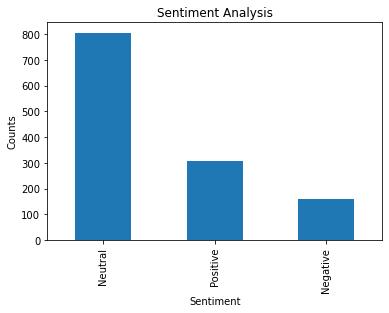

In [169]:
#display the sentiment result through barchart

textData['Textblob Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
textData['Textblob Analysis'].value_counts().plot(kind='bar')
plt.show

In [170]:
textblob_counts = textData['Textblob Analysis'].value_counts()
textblob_counts

Neutral     806
Positive    306
Negative    159
Name: Textblob Analysis, dtype: int64

### Sentiment Classification using VADER

In [171]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
def vadersentiment(text):
    vs = analyzer.polarity_scores(text)
    return vs['compound']
    
textData['Vader Sentiment'] = textData['Lemma'].apply(vadersentiment)


In [172]:
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
    
textData['Vader Analysis'] = textData['Vader Sentiment'].apply(vader_analysis)
textData.head()

,Texts,Clean Texts,tokens,POS Tagged,Lemma,Subjectivity,Polarity,Textblob Analysis,Vader Sentiment,Vader Analysis
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...,0.483333,0.233333,Positive,0.6223,Positive
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...,0.770833,-0.479167,Negative,0.3182,Neutral
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...,0.614484,0.383929,Positive,0.1541,Neutral
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD,0.000000,0.000000,Neutral,0.0000,Neutral
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...,0.766667,-0.288889,Negative,-0.9260,Negative


In [173]:
#Display the texts with sentiment choices
j=1
analysedText=textData.sort_values(by=['Vader Sentiment'])
sentiment_input = input("Enter the analysis (Negative/Neutral/Positive): ")

for i in range(0,analysedText.shape[0]):
     if(analysedText['Vader Analysis'].iloc[i]==sentiment_input):
        print (str(j) +')' + analysedText['Texts'].iloc[i])
        print()
        j=j+1

Enter the analysis (Negative/Neutral/Positive): Positive
1)看了很多sarawak美食 发现那边的食物真的和槟城很不一样 好想尝试  尤其是糟菜粉干和 “tia piang wu”(?)  Paku and midin 长得好像蜗牛！ 只能凭空幻想 用google description 来想像

2)I am stuck, between 2 guys. One is my boyfriend now and one is kind of like my crush.

3)Any good club or platform to join tk echance my skills and upgrade my resume? Pls drop suggestions here

4)Hi all, I wish to do my part in helping out the b40 students who need new clothes. Just drop a comment below and I will pm and send you the clothes. My clothing sizes are around S to M.

5)Can anyone suggest any platform of short course for free  with e-certificate. Especially for accounting and business students.

6)Hello everyone, I would like to ask if I need to go to the nerve centre to apply for the yellow form when I live in campus and go out for urgent matters?

7)The most kind and reliable senior I have ever met

8)i live in pedalaman area, no stable internet connection, i have to travel 30 minutes away to g

In [174]:
#Percentage of positive texts
posText=textData[textData['Vader Analysis']=='Positive']
posText=posText['Texts']

round( (posText.shape[0]/textData.shape[0])*100,1)

14.3

In [175]:
#Percentage of negative texts
negText=textData[textData['Vader Analysis']=='Negative']
negText=negText['Texts']

round( (negText.shape[0]/textData.shape[0])*100,1)

5.5

<function matplotlib.pyplot.show(close=None, block=None)>

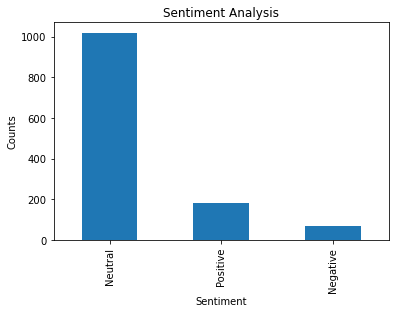

In [176]:
#display the vader sentiment result through barchart

textData['Vader Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
textData['Vader Analysis'].value_counts().plot(kind='bar')
plt.show

In [177]:
vader_counts = textData['Vader Analysis'].value_counts()
vader_counts

Neutral     1019
Positive     182
Negative      70
Name: Vader Analysis, dtype: int64

### Sentiment Classification using SentiWordNet

In [178]:
from nltk.corpus import sentiwordnet as swn

def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue

        # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        # print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
    if not tokens_count:
        return "Neutral"
    if sentiment>0:
        return "Positive"
    if sentiment==0:
        return "Neutral"
    else:
        return "Negative"

textData['SWN Analysis'] = textData['POS Tagged'].apply(sentiwordnetanalysis)
textData.head()

,Texts,Clean Texts,tokens,POS Tagged,Lemma,Subjectivity,Polarity,Textblob Analysis,Vader Sentiment,Vader Analysis,SWN Analysis
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...,0.483333,0.233333,Positive,0.6223,Positive,Positive
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...,0.770833,-0.479167,Negative,0.3182,Neutral,Negative
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...,0.614484,0.383929,Positive,0.1541,Neutral,Negative
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD,0.000000,0.000000,Neutral,0.0000,Neutral,Positive
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...,0.766667,-0.288889,Negative,-0.9260,Negative,Negative


In [179]:
#Display the texts with sentiment choices
j=1
analysedText=textData.sort_values(by=['SWN Analysis'])
sentiment_input = input("Enter the analysis (Negative/Neutral/Positive): ")

for i in range(0,analysedText.shape[0]):
     if(analysedText['SWN Analysis'].iloc[i]==sentiment_input):
        print (str(j) +')' + analysedText['Texts'].iloc[i])
        print()
        j=j+1

Enter the analysis (Negative/Neutral/Positive): Positive
1)Andai ramai jadi pro tumbuk kalau mereka kata nah ambik penumbuk ni dan kemudian mungkin mereka kata sila sarapan sebelum ditumbuk,Many would be pro punch if they told them to get punched then some would say you should take your breakfast before you get punched

2)Do guys know there's actually two different anonymous girl simping over j**** k**, the other anonymous girl aready change her mind to E****e, im the one that ask whether he's single but j***n said nahhh not now

3)It doesn't hurt to thank someone who help you. Even if someone was trying to help you but you find it not helpful, you should thank them too. Nobody has obligation to help anyone, just appreciate when someone is trying to help you. Just two words "thank you" is enough. Sometimes people will say "no need lah, why need to say thank you? We are good friends mahh. No say thank you looks more natural, I only say thank you to strangers or elderly". Or they will th

In [180]:
#Percentage of positive texts
posText=textData[textData['SWN Analysis']=='Positive']
posText=posText['Texts']

round( (posText.shape[0]/textData.shape[0])*100,1)

28.2

In [181]:
#Percentage of negative texts
negText=textData[textData['SWN Analysis']=='Negative']
negText=negText['Texts']

round( (negText.shape[0]/textData.shape[0])*100,1)

18.4

<function matplotlib.pyplot.show(close=None, block=None)>

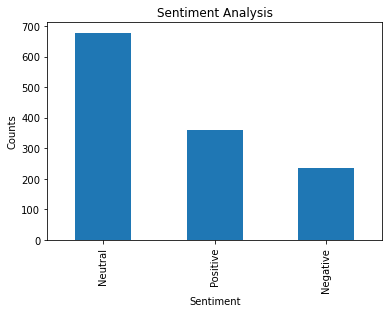

In [182]:
#display the vader sentiment result through barchart

textData['SWN Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
textData['SWN Analysis'].value_counts().plot(kind='bar')
plt.show

In [183]:
swn_counts = textData['SWN Analysis'].value_counts()
swn_counts

Neutral     678
Positive    359
Negative    234
Name: SWN Analysis, dtype: int64

### Comparison of Sentiment Classifications for TextBlob, VADER, SentiWordNet results

([<matplotlib.patches.Wedge at 0x2071dc85eb0>,
 [Text(-0.11534193580272765, 1.0939361214647223, 'Neutral'),
  Text(-0.6154128052328148, -1.2015685911155791, 'Positive'),
  Text(1.130414959975392, -0.7380122073948593, 'Negative')],
 [Text(-0.06291378316512417, 0.5966924298898485, '53.3%'),
  Text(-0.3874821366280685, -0.7565431869986978, '28.2%'),
  Text(0.7117427525770987, -0.46467435280417063, '18.4%')])

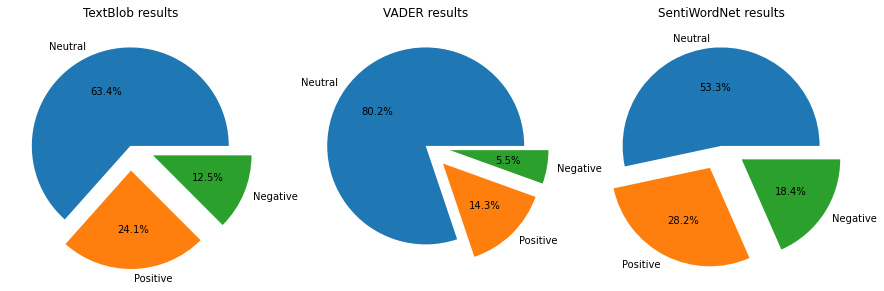

In [184]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(textblob_counts.values, labels = textblob_counts.index, explode = (0, 0.25, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0,0.25, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0.25, 0.25), autopct='%1.1f%%', shadow=False)

### Emotion classification on texts 

In [185]:
import text2emotion as te

def emotionText(text):
    return te.get_emotion(text)

textData['Emotions']=textData['Lemma'].apply(emotionText)
textData.head()

,Texts,Clean Texts,tokens,POS Tagged,Lemma,Subjectivity,Polarity,Textblob Analysis,Vader Sentiment,Vader Analysis,SWN Analysis,Emotions
1,I really hope USM authorities don't hurt this ...,I really hope USM authorities dont hurt this p...,"[I, really, hope, USM, authorities, dont, hurt...","[(really, r), (hope, v), (USM, n), (authoritie...",really hope USM authority dont hurt page sin...,0.483333,0.233333,Positive,0.6223,Positive,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2, ..."
2,I know it's hard time we going through but yet...,I know its hard time we going through but yet ...,"[I, know, its, hard, time, we, going, through,...","[(know, v), (hard, a), (time, n), (going, v), ...",know hard time go yet still desire get convo...,0.770833,-0.479167,Negative,0.3182,Neutral,Negative,"{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.0,..."
3,The only thing we need right now is Apology St...,The only thing we need right now is Apology St...,"[The, only, thing, we, need, right, now, is, A...","[(thing, n), (need, v), (right, r), (Apology, ...",thing need right Apology Statement Sjna mana...,0.614484,0.383929,Positive,0.1541,Neutral,Negative,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,..."
4,USM WE ALWAYS LEAD,USM WE ALWAYS LEAD,"[USM, WE, ALWAYS, LEAD]","[(USM, None), (ALWAYS, n), (LEAD, n)]",USM ALWAYS LEAD,0.000000,0.000000,Neutral,0.0000,Neutral,Positive,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
5,"Is it wrong for me to think ""why have kids whe...",Is it wrong for me to think why have kids when...,"[Is, it, wrong, for, me, to, think, why, have,...","[(wrong, a), (think, v), (kids, n), (ur, a), (...",wrong think kid ur financially capable provi...,0.766667,-0.288889,Negative,-0.9260,Negative,Negative,"{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.17..."


In [186]:
textData[['Texts','Emotions']]

,Texts,Emotions
1,I really hope USM authorities don't hurt this ...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.2, ..."
2,I know it's hard time we going through but yet...,"{'Happy': 0.0, 'Angry': 0.33, 'Surprise': 0.0,..."
3,The only thing we need right now is Apology St...,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.33,..."
4,USM WE ALWAYS LEAD,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
5,"Is it wrong for me to think ""why have kids whe...","{'Happy': 0.25, 'Angry': 0.0, 'Surprise': 0.17..."
...,...,...
1535,I hope Germany wins.,"{'Happy': 0.0, 'Angry': 0.0, 'Surprise': 0.0, ..."
1536,"We had been warned that we are ""violating the ...","{'Happy': 0.33, 'Angry': 0.0, 'Surprise': 0.17..."
1537,1) Be courteous (no name-calling & avoid curse...,"{'Happy': 0.0, 'Angry': 1.0, 'Surprise': 0.0, ..."
1538,These are the last few of them:,"{'Happy': 0, 'Angry': 0, 'Surprise': 0, 'Sad':..."


In [187]:
#convert the dataframe to a csv file
textData.to_csv("final-sentiment-data.csv",encoding='utf_8_sig')

# Model Implementation

## Data Splitting

In [188]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y =  train_test_split(textData["Lemma"], textData["SWN Analysis"], 
                                                     test_size = 0.2, random_state = 42)

In [189]:
print("X_train_shape : ",train_x.shape)
print("X_test_shape : ",test_x.shape)
print("y_train_shape : ",train_y.shape)
print("y_test_shape : ",test_y.shape)

X_train_shape :  (1016,)
X_test_shape :  (255,)
y_train_shape :  (1016,)
y_test_shape :  (255,)


## Feature extraction (vectorization)

### TfidfVectorizer 

In [190]:
#convert the text data into numbers by determine the rarity of a word in the corpus using Tf-idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
Tfidf_vect = TfidfVectorizer(max_features=1000, ngram_range=(1,3), stop_words='english')
Tfidf_vect.fit(textData["Lemma"])
Train_X_Tfidf = Tfidf_vect.transform(train_x).toarray()
Test_X_Tfidf = Tfidf_vect.transform(test_x).toarray()

In [191]:
print(Tfidf_vect.vocabulary_)

{'really': 692, 'hope': 396, 'usm': 939, 'dont': 238, 'hurt': 404, 'page': 606, 'feel': 301, 'admins': 13, 'totally': 900, 'mpp': 560, 'way': 970, 'reach': 686, 'official': 590, 'hope usm': 397, 'know': 460, 'hard': 368, 'time': 891, 'batch': 66, 'convo': 174, 'year': 991, 'maybe': 531, 'answer': 32, 'question': 677, 'answer question': 33, 'thing': 883, 'need': 573, 'right': 727, 'statement': 812, 'management': 522, 'point': 641, 'didnt': 225, 'yes': 994, 'student': 829, 'fault': 297, 'night': 582, 'make': 513, 'sure': 851, 'wont': 980, 'happen': 364, 'case': 113, 'make sure': 514, 'wrong': 987, 'think': 884, 'kid': 454, 'ur': 934, 'provide': 668, 'everytime': 279, 'parent': 610, 'unable': 921, 'especially': 275, 'food': 320, 'poor': 642, 'country': 178, 'guy': 358, 'miss': 552, 'information': 424, 'hear': 374, 'tell': 866, 'study': 840, 'course': 180, 'current': 191, 'issue': 439, 'original': 602, 'rate': 683, 'translation': 903, 'original rate': 603, 'rate translation': 684, 'origina

### CountVectorizer 

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer =  CountVectorizer(analyzer="word",tokenizer=None,preprocessor=None, stop_words='english', max_features= 2000)
count_vectorizer.fit(textData["Lemma"])
Train_X_cv = count_vectorizer.transform(train_x)
Test_X_cv = count_vectorizer.transform(test_x)
features = count_vectorizer.get_feature_names()
features_counts = np.sum(Train_X_cv.toarray(), axis = 0)
features_counts = pd.DataFrame(dict(features =  features, counts = features_counts))
features_counts.sort_values("counts", ascending= False)[0:10]

,features,counts
1785,usm,122
1489,student,106
636,like,91
531,im,91
600,know,86
311,dont,75
1859,want,74
1957,year,62
747,need,57
153,campus,49


# Model Training and Prediction using Naive Bayes classifiers

### Multinomial Naive Bayes

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
#Multinomial Naive Bayes classifier
from sklearn.naive_bayes import MultinomialNB 
MNB=MultinomialNB()
MNB.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_MNB =MNB.predict(Test_X_Tfidf)

In [194]:
# Use accuracy_score function to get the accuracy
print("Multinomial Naive Bayes Accuracy Score : ",accuracy_score(predictions_MNB, test_y)*100)

Multinomial Naive Bayes Accuracy Score :  66.27450980392156


In [195]:
from sklearn import metrics
print(metrics.classification_report(test_y,predictions_MNB))

              precision    recall  f1-score   support

    Negative       0.75      0.07      0.13        43
     Neutral       0.65      0.97      0.78       145
    Positive       0.72      0.39      0.50        67

    accuracy                           0.66       255
   macro avg       0.71      0.47      0.47       255
weighted avg       0.69      0.66      0.60       255



In [197]:
params = {'alpha': [0.01, 0.1, 0.5, 1.0, 10.0, ],
         }

In [198]:
MNB_grid = GridSearchCV(MultinomialNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)

In [199]:
MNB_grid.fit(Train_X_Tfidf,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    3.2s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    3.2s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    3.2s finished


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [200]:
print(MNB_grid.best_estimator_)

MultinomialNB(alpha=0.01)


In [201]:
grid_predictions = MNB_grid.predict(Test_X_Tfidf)
print("MNB Accuracy Score :",accuracy_score(grid_predictions, test_y)*100)
print(metrics.classification_report(test_y,grid_predictions))

MNB Accuracy Score : 69.80392156862744
              precision    recall  f1-score   support

    Negative       0.38      0.40      0.39        43
     Neutral       0.88      0.81      0.84       145
    Positive       0.57      0.66      0.61        67

    accuracy                           0.70       255
   macro avg       0.61      0.62      0.61       255
weighted avg       0.71      0.70      0.70       255



### Gaussian Naive Bayes

In [202]:
#Gaussian Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB  # Naive Bayes Classifier
GNB=GaussianNB()
GNB.fit(Train_X_Tfidf, train_y) 
predictions_GNB = GNB.predict(Test_X_Tfidf)

In [203]:
#Find out accuracy of the model prediction
print("Gaussian Naive Bayes Testing Accuracy Score : ",accuracy_score(predictions_GNB, test_y)*100)

Gaussian Naive Bayes Testing Accuracy Score :  66.66666666666666


In [204]:
print(metrics.classification_report(test_y,predictions_GNB))

              precision    recall  f1-score   support

    Negative       0.32      0.49      0.39        43
     Neutral       0.91      0.78      0.84       145
    Positive       0.55      0.54      0.54        67

    accuracy                           0.67       255
   macro avg       0.59      0.60      0.59       255
weighted avg       0.72      0.67      0.69       255



### Bernoulli Naive Bayes 

In [205]:
#Bernoulli Naive Bayes classifier
from sklearn.naive_bayes import BernoulliNB  # Naive Bayes Classifier
BNB=BernoulliNB()
BNB.fit(Train_X_Tfidf, train_y) 
predictions_BNB = BNB.predict(Test_X_Tfidf)

In [206]:
#Find out accuracy of the model prediction

print("Bernoulli Naive Bayes Testing Accuracy Score : ",accuracy_score(predictions_BNB, test_y)*100)

Bernoulli Naive Bayes Testing Accuracy Score :  70.98039215686275


In [207]:
print(metrics.classification_report(test_y,predictions_BNB))

              precision    recall  f1-score   support

    Negative       0.50      0.30      0.38        43
     Neutral       0.75      0.95      0.84       145
    Positive       0.65      0.45      0.53        67

    accuracy                           0.71       255
   macro avg       0.64      0.57      0.58       255
weighted avg       0.68      0.71      0.68       255



In [208]:
BNB_grid = GridSearchCV(BernoulliNB(), param_grid=params, n_jobs=-1, cv=5, verbose=5)

In [209]:
BNB_grid.fit(Train_X_Tfidf,train_y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  25 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  25 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:    0.2s finished


GridSearchCV(cv=5, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 0.5, 1.0, 10.0]}, verbose=5)

In [210]:
print(BNB_grid.best_estimator_)

BernoulliNB(alpha=0.01)


In [211]:
grid_predictions = BNB_grid.predict(Test_X_Tfidf)
print("MNB Accuracy Score :",accuracy_score(grid_predictions, test_y)*100)
print(metrics.classification_report(test_y,grid_predictions))

MNB Accuracy Score : 71.76470588235294
              precision    recall  f1-score   support

    Negative       0.39      0.37      0.38        43
     Neutral       0.87      0.89      0.88       145
    Positive       0.58      0.57      0.58        67

    accuracy                           0.72       255
   macro avg       0.61      0.61      0.61       255
weighted avg       0.71      0.72      0.71       255



# Model Training and Prediction using Support vector machines (SVMs)

In [212]:

from sklearn import svm

SVM = svm.SVC(C=1, kernel='linear', degree=3, gamma="auto")
SVM.fit(Train_X_Tfidf,train_y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score : ",accuracy_score(predictions_SVM, test_y)*100)
print(metrics.classification_report(test_y,predictions_SVM))

SVM Accuracy Score :  72.94117647058823
              precision    recall  f1-score   support

    Negative       0.50      0.26      0.34        43
     Neutral       0.78      0.94      0.86       145
    Positive       0.66      0.57      0.61        67

    accuracy                           0.73       255
   macro avg       0.65      0.59      0.60       255
weighted avg       0.70      0.73      0.70       255



In [213]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [214]:
grid = GridSearchCV(SVM,param_grid,refit=True,verbose=2)
grid.fit(Train_X_Tfidf,train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ....................... C=0.1, gamma=1, kernel=rbf, total=   1.0s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.3s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] ...................... C=0.1, gamma=1, kernel=poly, total=   1.2s
[CV] C=0.1, gamma=1, kernel=poly .....................................
[CV] .

[CV] ............... C=0.1, gamma=0.001, kernel=sigmoid, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.2s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ......................... C=1, gamma=1, kernel=rbf, total=   1.3s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] ........................ C=1, gamma=1, kernel=poly, total=   1.6s
[CV] C=1, gamma=1, kernel=poly .......................................
[CV] .

[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   1.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   1.0s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] ................. C=1, gamma=0.001, kernel=sigmoid, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........................ C=10, gamma=1, kernel=rbf, total=   1.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   1.2s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=10, gamma=0.001, kernel=sigmoid ...............................
[CV] ................ C=10, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] ....................... C=100, gamma=1, kernel=rbf, total=   1.0s
[CV] C=100, gamma=1, kernel=rbf ......................................
[CV] .

[CV] .................. C=100, gamma=0.001, kernel=poly, total=   0.9s
[CV] C=100, gamma=0.001, kernel=poly .................................
[CV] .................. C=100, gamma=0.001, kernel=poly, total=   1.0s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   1.1s
[CV] C=100, gamma=0.001, kernel=sigmoid ..............................
[CV] ............... C=100, gamma=0.001, kernel=sigmoid, total=   1.1s


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  4.5min finished


GridSearchCV(estimator=SVC(C=1, gamma='auto', kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [215]:
print(grid.best_estimator_)

SVC(C=10, gamma=1)


In [216]:
grid_predictions = grid.predict(Test_X_Tfidf)

In [217]:
print("SVM Accuracy Score :",accuracy_score(grid_predictions, test_y)*100)

SVM Accuracy Score : 72.94117647058823


In [218]:
print(metrics.classification_report(test_y,grid_predictions))

              precision    recall  f1-score   support

    Negative       0.52      0.33      0.40        43
     Neutral       0.84      0.86      0.85       145
    Positive       0.59      0.70      0.64        67

    accuracy                           0.73       255
   macro avg       0.65      0.63      0.63       255
weighted avg       0.72      0.73      0.72       255

